In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df=pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# Data Cleaning

In [4]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
col_names = [col.lower().replace(' ', '_') for col in df.columns]
df.columns=col_names
df.head()

,request_id,pickup_point,status,request_timestamp,drop_timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   status             6745 non-null   object        
 3   request_timestamp  6745 non-null   datetime64[ns]
 4   drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


In [14]:
df[(df['drop_timestamp'].isnull())].groupby('status').size()

status
Cancelled            1264
No Cars Available    2650
dtype: int64

# Visual Analysis

<AxesSubplot:xlabel='status'>

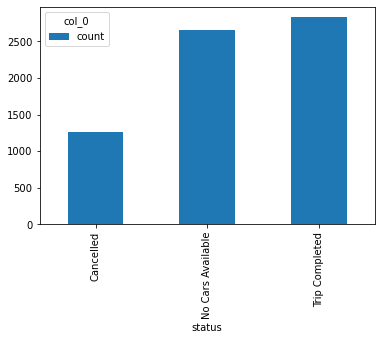

In [19]:
#Visual Analysis on the status column
status=pd.crosstab(index=df["status"],columns="count")
status.plot.bar()

#### The above chart shows that No cars Available scenario is occured less than Trip Completed scenario.

<AxesSubplot:xlabel='pickup_point'>

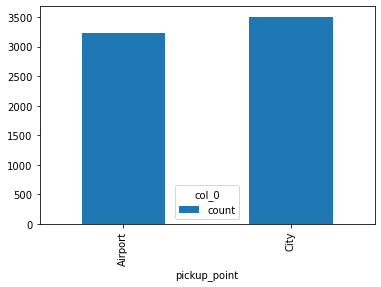

In [20]:
#Visual Analysis on the Pickup Point column
pp=pd.crosstab(index=df['pickup_point'],columns='count')
pp.plot.bar()

#### The pickup points Airport and City are present equal times in the dataset.

In [21]:
df.groupby(['status','pickup_point']).size()

status             pickup_point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

<AxesSubplot:xlabel='pickup_point', ylabel='count'>

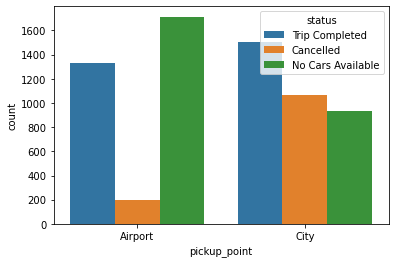

In [24]:
sns.countplot(x=df['pickup_point'],hue=df['status'],data=df)

#### More number of No cars available from Airport to city and also more cars are cancelled from city to airport.

In [30]:
df['Request_Hour'] = df['request_timestamp'].dt.hour

In [37]:
#Time Slots
df['Request Time Slot'] = 'Early Morning'
df.loc[df['Request_Hour'].between(5,8, inclusive='both'),'Request Time Slot'] = 'Morning'
df.loc[df['Request_Hour'].between(9,12, inclusive='both'),'Request Time Slot'] = 'Late Morning'
df.loc[df['Request_Hour'].between(13,16, inclusive='both'),'Request Time Slot'] = 'Noon'
df.loc[df['Request_Hour'].between(17,21, inclusive='both'),'Request Time Slot'] = 'Evening'
df.loc[df['Request_Hour'].between(21,24, inclusive='both'),'Request Time Slot'] = 'Night'

In [38]:
df['Demand']=1

In [39]:
df['supply']=0
df.loc[(df['status']=='Trip Completed'),'supply']=1

In [41]:
df['Gap'] = df['Demand'] - df['supply']
df.loc[df['Gap']==0,'Gap'] = 'Trip Completed'
df.loc[df['Gap']==1,'Gap'] = 'Trip Not Completed'

In [42]:
df = df.drop(['Request Hour', 'Demand', 'supply'], axis=1)

In [43]:
df.head()

,request_id,pickup_point,status,request_timestamp,drop_timestamp,Request Time Slot,Request_Hour,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,11,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,17,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,9,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,21,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,8,Trip Completed


<AxesSubplot:xlabel='Request Time Slot', ylabel='count'>

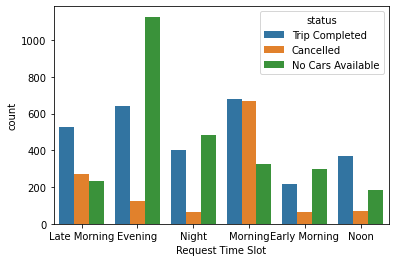

In [44]:
sns.countplot(x=df['Request Time Slot'],hue=df['status'],data=df)

#### The Number of Cars not available is more in the evening.Most trips that are cancelled are in the Morning.

<AxesSubplot:xlabel='pickup_point,Request Time Slot'>

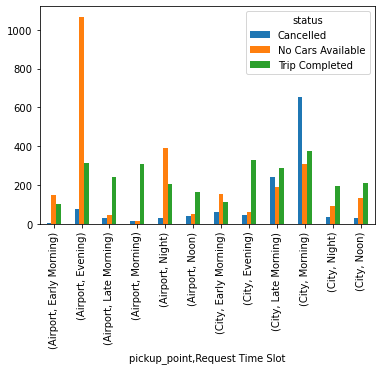

In [46]:
pickup_df=pd.DataFrame(df.groupby(['pickup_point','Request Time Slot','status'])['request_id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

#### No cars available is more in the Evening From airport to city.Most cancelled trips are from city to airport in the morning.

<AxesSubplot:xlabel='Gap', ylabel='count'>

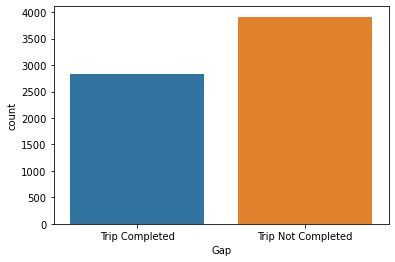

In [47]:
sns.countplot(x=df['Gap'],data=df)

#### Number of Trip completed is less than number of trips not completed.

<AxesSubplot:xlabel='Request Time Slot'>

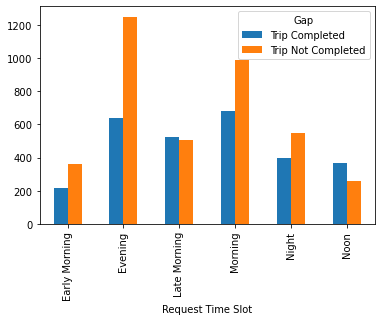

In [49]:
gap_timeslot=pd.DataFrame(df.groupby(['Request Time Slot','Gap'])['request_id'].count().unstack(fill_value=0))
gap_timeslot.plot.bar()

#### Number of Trip Not completed in the Evening is the Highest in a single day.

#### Conclusions:
1)For bridging the demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly.

2)Uber can provide some incentives to the driver who complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.

3)Last but sure solution to bring down the gap is to increase the numbers of cab in its fleet.